In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("/content/cyberbullying_tweets (1).csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


##Data Exploration

In [15]:
df.shape

(47692, 2)

In [16]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [18]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,Going to see @TheQuinnspiracy's movie I AM SO ...,religion
freq,2,7998


##Data Preprocessing

In [19]:
!pip install demoji emoji --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.1 MB/s eta 0:00:00


In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-21-460b13fed6ee>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [22]:
import emoji

# Set of cyberbullying-related emojis defined by their Unicode
cyberbullying_emojis = {
    "💩", "🤬", "😡", "😠", "👎", "🖕", "😤", "🤯", "👿", "💔", "😞", "😒", "🙄",
    "🤢", "🤮", "💀", "💣", "🔪", "🔥"
}

# Function to replace cyberbullying emojis with placeholder text
def replace_cyberbullying_emojis(text):
    # Replace cyberbullying emojis with placeholder text
    for emoji_char in cyberbullying_emojis:
        text = text.replace(emoji_char, "[CYBERBULLYING_EMOJI]")

    # Remove all other emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters

    return text


Lemmatization (Better)

In [23]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update([
    'rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y',
    've', 'u', 'ur', 'don', 'p', 't', 's', 'aren', 'kp',
    'o', 'kat', 'de', 're', 'amp', 'will', 'wa', 'e', 'like'
])

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text_2(text):
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)

    # Remove excess whitespace
    text = " ".join(text.split())

    # Convert text to lowercase
    text = text.lower()

    # Apply lemmatization to the words
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Handle emojis
    emoji_dict = demoji.findall(text)
    for emoticon, description in emoji_dict.items():
        text = text.replace(emoticon, "_".join(description.split()))

    return text

In [24]:
df_2 = df.copy()

In [25]:
df_2['cleaned_text'] = df_2['tweet_text'].apply(lambda text: clean_text_2(text))

In [26]:
df_2.head()

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,gio meh thanks head concerned another angry du...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account islam lies


In [27]:
# Checking for missing values
df_2.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0
cleaned_text,0


In [28]:
# Checking the presence of duplicated records
print(f"Number of duplicate values: {df_2.duplicated().sum()}")

Number of duplicate values: 36


In [29]:
# Dropping duplicate records
cleaned_df = df_2.drop_duplicates()
cleaned_df.shape

(47656, 3)

In [30]:
cleaned_df = cleaned_df[cleaned_df["cyberbullying_type"]!="other_cyberbullying"]

=> Removed 'other_cyberbullying' as it may lead to ambiguity

In [31]:
cleaned_df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937


In [32]:
cyberbully_data = cleaned_df.copy()

In [33]:
cyberbully_data.to_csv("cyberbully_data.csv", index=False)

##Performing EDA

In [34]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
unique_types = cyberbully_data.cyberbullying_type.unique()
pastel_colors = px.colors.qualitative.Pastel[:len(unique_types)]

color_map = {cyber_type: pastel_colors[i] for i, cyber_type in enumerate(unique_types)}

Counting the instances of each cyberbullying type

In [36]:
pastel_color = sns.color_palette("pastel", n_colors=len(unique_types))

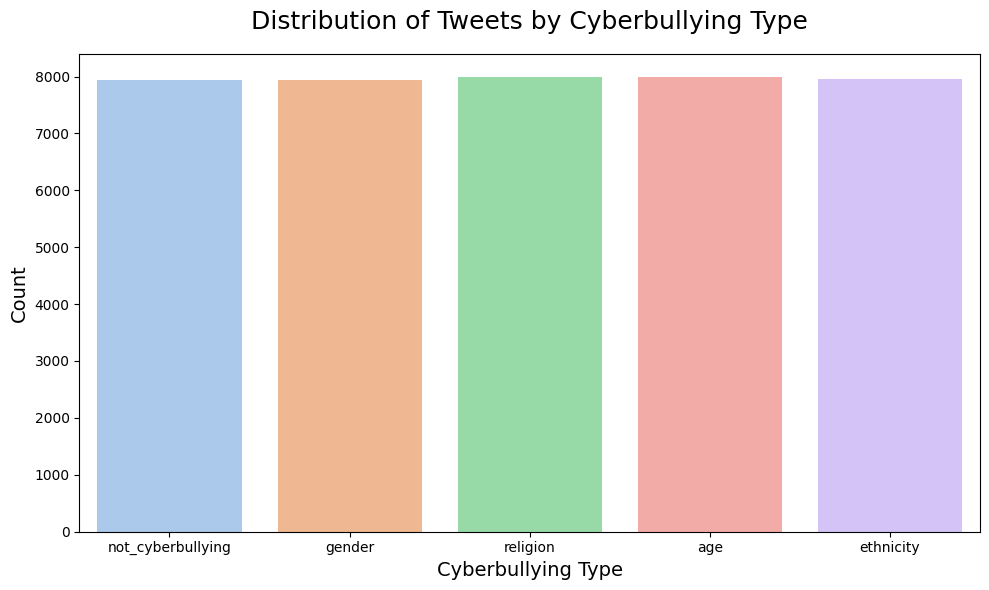

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cyberbully_data, x='cyberbullying_type', hue='cyberbullying_type', palette=pastel_color)
plt.title('Distribution of Tweets by Cyberbullying Type', fontsize=18, pad=18)

plt.xlabel('Cyberbullying Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

=> The no. of instances for each cyberbullying type is almost equal.

####This is a balanced dataset.

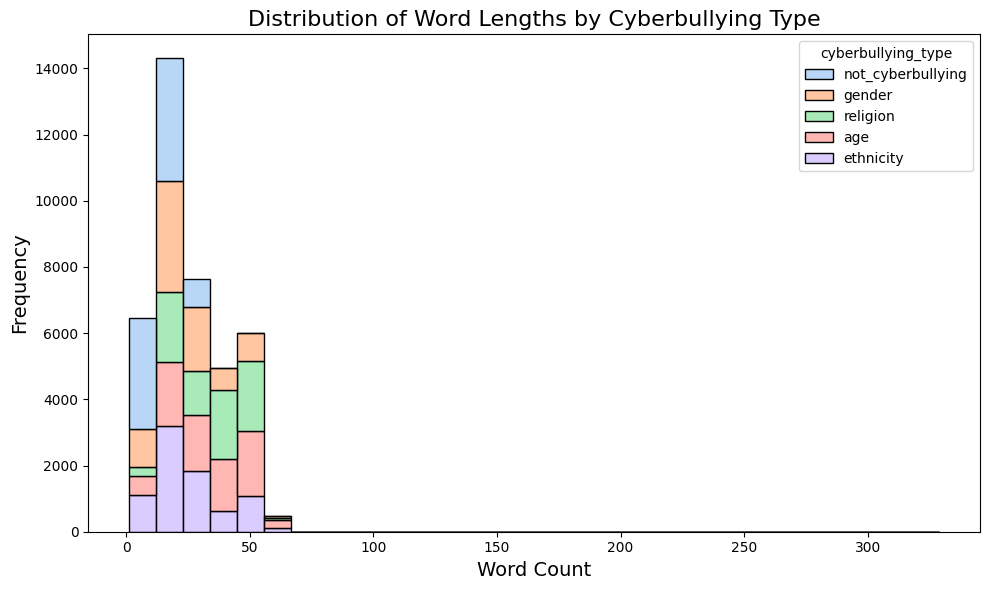

In [38]:
# Calculate word lengths for each tweet
cyberbully_data['word_count'] = cyberbully_data['tweet_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=cyberbully_data, x='word_count', hue='cyberbullying_type', multiple='stack', palette='pastel', bins=30)
plt.title('Distribution of Word Lengths by Cyberbullying Type', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

=> How tweet lengths vary across different types of cyberbullying

=> Helps identify which cyberbullying types tend to have shorter or longer tweets

In [39]:
from wordcloud import WordCloud

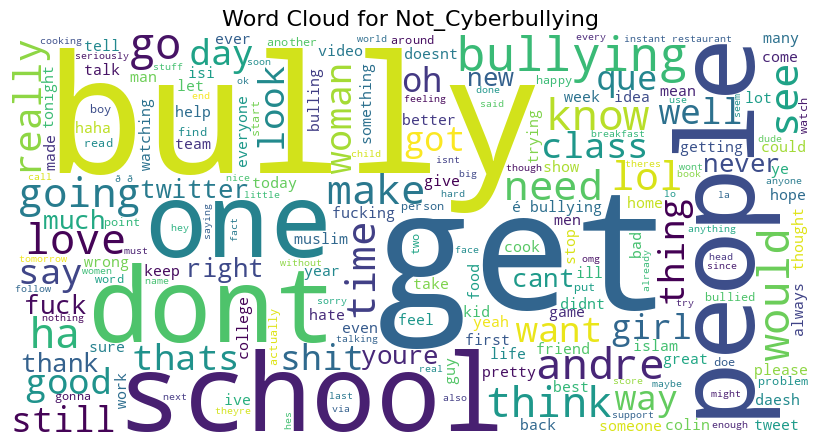

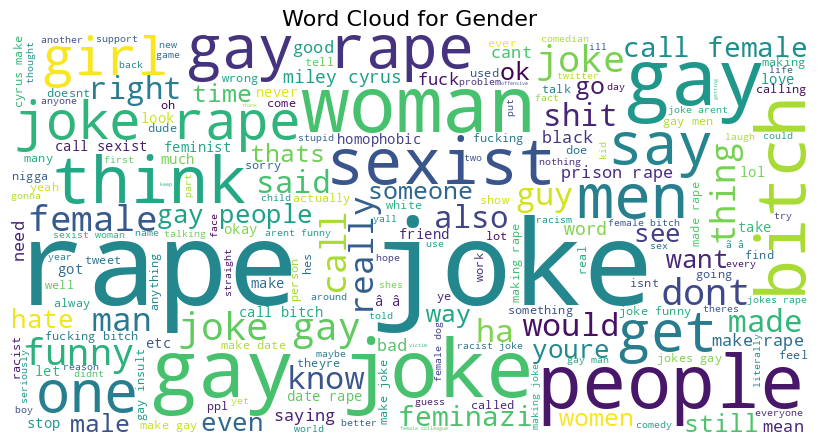

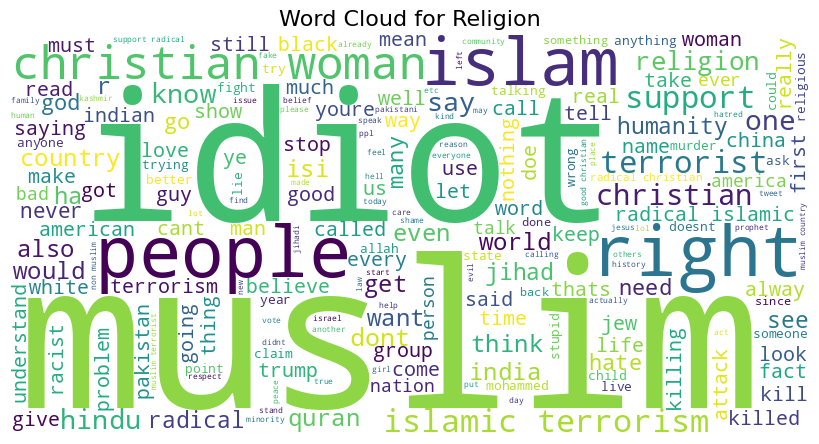

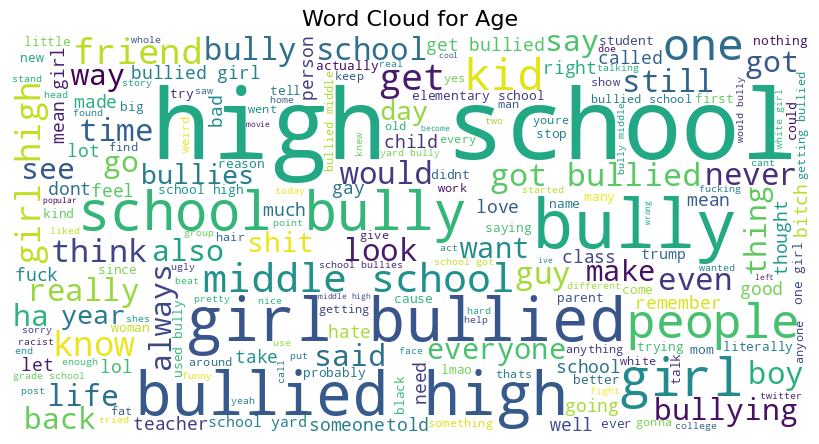

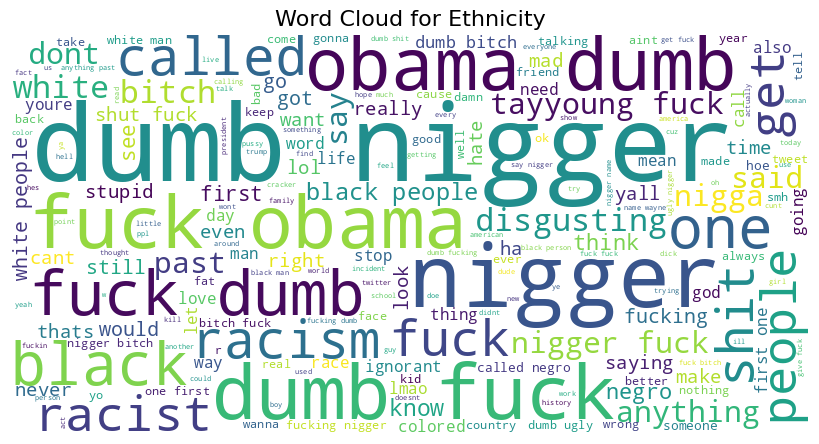

In [42]:
# Create word clouds for each cyberbullying type
cyberbullying_types = cyberbully_data['cyberbullying_type'].unique()

for cyber_type in cyberbullying_types:
    plt.figure(figsize=(8, 8))
    subset = cyberbully_data[cyberbully_data['cyberbullying_type'] == cyber_type]
    text = " ".join(subset['cleaned_text'].values)

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {cyber_type.title()}", fontsize=16)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Top 20 words for each cyberbullying type

In [43]:
for cyber_type in unique_types:

    # Get the top 20 words for the current cyberbullying type
    top20_word = cyberbully_data.cleaned_text[cyberbully_data.cyberbullying_type == cyber_type].str.split(expand=True).stack().value_counts()[:20]

    # Create a bar plot using the mapped color for the current cyber_type
    fig = px.bar(top20_word,
                 color=top20_word.index,  # Use the words as color categories
                 color_discrete_sequence=[color_map[cyber_type]],  # Use the color mapped to the current type
                 custom_data=[top20_word.values])

    # Update traces and layout
    fig.update_traces(marker_color=color_map[cyber_type])  # Set the marker color
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 20 words for {cyber_type}",
                      template='simple_white',
                      hovermode='x unified',
                      showlegend=False)

    # Show the plot
    fig.show()

In [44]:
# Combine all cleaned text into one series
all_words = cyberbully_data.cleaned_text.str.cat(sep=' ')

# Count word frequencies
top_words = pd.Series(all_words.split()).value_counts()[:20]

# Display the top 20 words
print("Top 20 common words across all cyberbullying types:")
top_words

Top 20 common words across all cyberbullying types:


,count
school,8935
fuck,5828
dumb,5298
girl,5122
high,5079
nigger,4781
bullied,4456
people,4395
bully,4295
joke,4193


##Data Preparation


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = cleaned_df['cleaned_text']
y = cleaned_df['cyberbullying_type']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [48]:
y_train.head()

,cyberbullying_type
32746,age
6990,not_cyberbullying
43985,ethnicity
9543,gender
6889,not_cyberbullying


Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(max_features = 5000)

In [51]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [52]:
X_train_tfidf

<35849x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 397308 stored elements in Compressed Sparse Row format>

In [53]:
X_test_tfidf

<3984x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 43690 stored elements in Compressed Sparse Row format>

##Model Training

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

####Support Vector Machine

In [55]:
from sklearn.svm import SVC

In [56]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
                    precision    recall  f1-score   support

              age       0.96      0.98      0.97       798
        ethnicity       0.98      0.98      0.98       761
           gender       0.95      0.81      0.88       809
not_cyberbullying       0.79      0.88      0.83       836
         religion       0.95      0.95      0.95       780

         accuracy                           0.92      3984
        macro avg       0.92      0.92      0.92      3984
     weighted avg       0.92      0.92      0.92      3984



####Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
                    precision    recall  f1-score   support

              age       0.98      0.98      0.98       798
        ethnicity       0.99      0.99      0.99       761
           gender       0.92      0.85      0.88       809
not_cyberbullying       0.82      0.87      0.85       836
         religion       0.95      0.96      0.95       780

         accuracy                           0.93      3984
        macro avg       0.93      0.93      0.93      3984
     weighted avg       0.93      0.93      0.93      3984



####Gradient Boost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

y_pred_gb = gb_model.predict(X_test_tfidf)

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
                    precision    recall  f1-score   support

              age       0.98      0.98      0.98       798
        ethnicity       1.00      0.99      0.99       761
           gender       0.95      0.79      0.87       809
not_cyberbullying       0.77      0.92      0.84       836
         religion       0.96      0.93      0.94       780

         accuracy                           0.92      3984
        macro avg       0.93      0.92      0.92      3984
     weighted avg       0.93      0.92      0.92      3984



##Pipeline

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [62]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('rf_model', RandomForestClassifier(n_estimators=128, random_state=42))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('rf_model',
                 RandomForestClassifier(n_estimators=128, random_state=42))])

In [63]:
tweet = ["@abc Hey man! Great match today. Your smashes were spot on. Let's continue playing together. \
            #badminton #brotherhood #men #doubles"]

In [64]:
tweet_1 = ["Why dont you just disappear? The world would be better without you."]

In [65]:
y_pred = pipe.predict(tweet_1)
y_pred

array(['not_cyberbullying'], dtype=object)

In [66]:
y_pred_rf = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy Score: {accuracy:.4f}")

Random Forest Accuracy Score: 0.9295


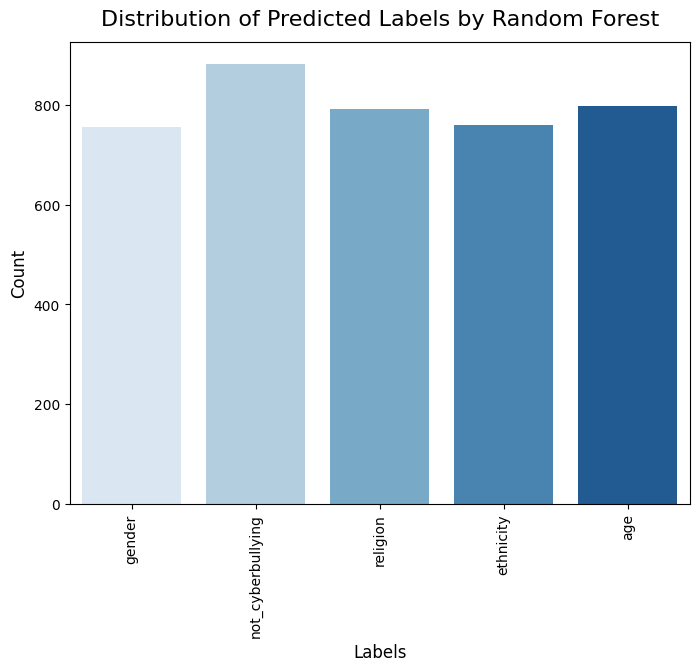

In [67]:
plt.figure(figsize=(8, 6))

sns.countplot(x=y_pred_rf, palette="Blues", hue=y_pred_rf, dodge=False, legend=False)
plt.title("Distribution of Predicted Labels by Random Forest", fontsize=16, pad=12)

plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=90)

plt.show()

###Word EMbeddings and LSTM

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pickle

In [69]:
# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [70]:
with open('/content/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [71]:
# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(y_train.unique()), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform labels to convert them to integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

class_labels = label_encoder.classes_

# Print the encoding map
print("Encoding map:")
for index, label in enumerate(class_labels):
    print(f"{index}: {label}")

Encoding map:
0: age
1: ethnicity
2: gender
3: not_cyberbullying
4: religion


In [73]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

Epoch 1/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 392s 341ms/step - accuracy: 0.7867 - loss: 0.5745 - val_accuracy: 0.9229 - val_loss: 0.2242
Epoch 2/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 428s 334ms/step - accuracy: 0.9367 - loss: 0.1865 - val_accuracy: 0.9212 - val_loss: 0.2320
Epoch 3/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 390s 341ms/step - accuracy: 0.9495 - loss: 0.1509 - val_accuracy: 0.9187 - val_loss: 0.2553
Epoch 4/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 440s 339ms/step - accuracy: 0.9555 - loss: 0.1257 - val_accuracy: 0.9111 - val_loss: 0.2807
Epoch 5/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - accuracy: 0.9631 - loss: 0.1040 - val_accuracy: 0.9134 - val_loss: 0.2864


In [74]:
model.save('Tweet_Sentiment_Prediction_Model.h5')

In [75]:
model.save('Tweet_Sentiment_Prediction_Model.keras')

In [76]:
def predict_tweet(tweet, tokenizer, model, max_length):
    # Preprocess the tweet: tokenize and pad to the same length
    tweet_seq = tokenizer.texts_to_sequences([tweet])
    tweet_pad = pad_sequences(tweet_seq, maxlen=max_length, padding='post', truncating='post')

    # Predict the class
    prediction = model.predict(tweet_pad)
    predicted_class = prediction.argmax(axis=-1)[0]  # Get the class with highest probability

    return predicted_class

In [77]:
user_tweet = ["Why dont you just disappear? The world would be better without you."]

In [78]:
predicted_class = predict_tweet(user_tweet, tokenizer, model, 50)
predicted_class_label = label_encoder.inverse_transform([predicted_class])
print(f"Predicted class for the input tweet: {predicted_class_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Predicted class for the input tweet: not_cyberbullying


In [79]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/Tweet_Sentiment_Prediction_Model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



###Bidirectional  LSTM

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [81]:
def create_bidirectional_lstm_model(vocab_size, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

    # Add a Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dropout(0.5))

    model.add(Dense(5, activation='softmax'))

    return model

In [82]:
vocab_size = 10000
embedding_dim = 100
max_length = 50

In [83]:
bi_lstm = create_bidirectional_lstm_model(vocab_size, embedding_dim, max_length)
bi_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [84]:
bi_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

Epoch 1/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 389s 345ms/step - accuracy: 0.9700 - loss: 0.0829 - val_accuracy: 0.9111 - val_loss: 0.3503
Epoch 2/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 387s 345ms/step - accuracy: 0.9748 - loss: 0.0728 - val_accuracy: 0.9031 - val_loss: 0.3900
Epoch 3/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 442s 345ms/step - accuracy: 0.9752 - loss: 0.0702 - val_accuracy: 0.9081 - val_loss: 0.4027
Epoch 4/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 441s 344ms/step - accuracy: 0.9792 - loss: 0.0653 - val_accuracy: 0.9031 - val_loss: 0.3910
Epoch 5/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 384s 343ms/step - accuracy: 0.9777 - loss: 0.0697 - val_accuracy: 0.9106 - val_loss: 0.3977


In [86]:
def predict_tweet(user_tweet, tokenizer, model, max_length):
    tweet_sequence = tokenizer.texts_to_sequences([user_tweet])
    tweet_pad = pad_sequences(tweet_sequence, maxlen=max_length)

    predicted_class = model.predict(tweet_pad)
    predicted_class_label = label_encoder.inverse_transform([predicted_class.argmax()])

    return predicted_class_label[0]

In [87]:
user_tweet = ["Why dont you just disappear? The world would be better without you."]

In [88]:
predicted_class = predict_tweet(user_tweet, tokenizer, model, max_length)
print(f"Predicted class for the input tweet: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted class for the input tweet: not_cyberbullying


###BERT

In [89]:
!pip install transformers torch --quiet

In [90]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline

In [91]:
cyberbully_data = pd.read_csv("/content/cyberbully_data.csv")

In [92]:
cyberbully_data.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0
cleaned_text,182


In [93]:
# Encode labels
label_encoder = LabelEncoder()

cyberbully_data['cyberbullying_type'] = label_encoder.fit_transform(cyberbully_data['cyberbullying_type'])
label_names = label_encoder.classes_

In [94]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    cyberbully_data['cleaned_text'].tolist(),
    cyberbully_data['cyberbullying_type'].tolist(),
    test_size=0.2,
    random_state=42
)

In [95]:
train_texts = [str(text) for text in train_texts if text is not None]
val_texts = [str(text) for text in val_texts if text is not None]

In [96]:
# Initialize tokenizer and BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_names))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [97]:
# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [98]:
# Create a Dataset class
class CyberbullyingDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [99]:
# Create train and validation datasets
train_dataset = CyberbullyingDataset(train_encodings, train_labels)
val_dataset = CyberbullyingDataset(val_encodings, val_labels)

In [100]:
# Set up training arguments and trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



In [101]:
print(torch.cuda.is_available())

True


In [102]:
# Fine-tune the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.274900,0.253215
2,0.196000,0.298212
3,0.133200,0.339198


TrainOutput(global_step=11952, training_loss=0.23486165093928776, metrics={'train_runtime': 2726.553, 'train_samples_per_second': 35.062, 'train_steps_per_second': 4.384, 'total_flos': 6288392045818368.0, 'train_loss': 0.23486165093928776, 'epoch': 3.0})

####Performance Evaluation

In [103]:
# VALIDATION ACCURACY:

eval_results = trainer.evaluate()
eval_results

{'eval_loss': 0.33919844031333923,
 'eval_runtime': 45.7269,
 'eval_samples_per_second': 174.23,
 'eval_steps_per_second': 21.781,
 'epoch': 3.0}

In [104]:
from sklearn.metrics import classification_report

predictions = trainer.predict(val_dataset)
pred_labels = predictions.predictions.argmax(-1)
true_labels = predictions.label_ids

print(classification_report(true_labels, pred_labels, target_names=label_names))


                   precision    recall  f1-score   support

              age       0.99      0.98      0.98      1596
        ethnicity       0.98      0.99      0.99      1597
           gender       0.91      0.88      0.89      1577
not_cyberbullying       0.84      0.86      0.85      1630
         religion       0.95      0.97      0.96      1567

         accuracy                           0.93      7967
        macro avg       0.93      0.93      0.93      7967
     weighted avg       0.93      0.93      0.93      7967



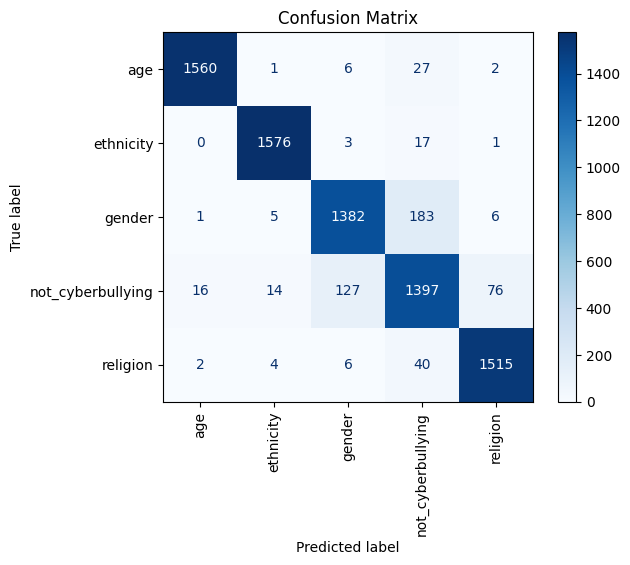

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(
    true_labels, pred_labels, display_labels=label_names, cmap="Blues"
)

plt.xticks(rotation=90)
plt.title("Confusion Matrix")
plt.show()

####Save the Trained Model

In [106]:
# Save the fine-tuned model
model.save_pretrained("cyberbullying_bert_model")
tokenizer.save_pretrained("cyberbullying_bert_tokenizer")

('cyberbullying_bert_tokenizer/tokenizer_config.json',
 'cyberbullying_bert_tokenizer/special_tokens_map.json',
 'cyberbullying_bert_tokenizer/vocab.txt',
 'cyberbullying_bert_tokenizer/added_tokens.json')

In [107]:
# Save model weights manually using PyTorch
torch.save(model.state_dict(), 'cyberbullying_bert_model/pytorch_model.bin')

####Predictions

In [108]:
# Load the saved tokenizer and model
model_path = "cyberbullying_bert_model"
tokenizer_path = "cyberbullying_bert_tokenizer"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [109]:
def predict_class(text):
    # Tokenize
    encodings = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**encodings)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    return label_names[prediction]

In [ ]:
print('------------------------------')
print('CYBERBULLY PREDICTION SYSTEM')
print('------------------------------\n')
print("\nEnter the tweet:")

while True:
    user_input = input("Input: ")
    if user_input.lower() == "exit":
        print("Exiting...")
        break
    predicted_class = predict_class(user_input)
    print(f"Predicted Class: {predicted_class}\n")

------------------------------
CYBERBULLY PREDICTION SYSTEM
------------------------------


Enter the tweet:
Input: You don't look gay; are you sure you're not faking it?
